# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train, y_label_train), \
(x_image_test, y_label_test)=cifar100.load_data()

In [3]:
print('train:', len(x_img_train))
print('test:', len(x_image_test))

train: 50000
test: 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
y_label_train.shape

(50000, 1)

In [6]:
x_image_test.shape

(10000, 32, 32, 3)

In [7]:
y_label_test.shape

(10000, 1)

In [8]:
len(np.unique(y_label_train))

100

In [9]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個呈現影像的函數
def plot_images_labels_prediction(images,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>100: num=100 
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()


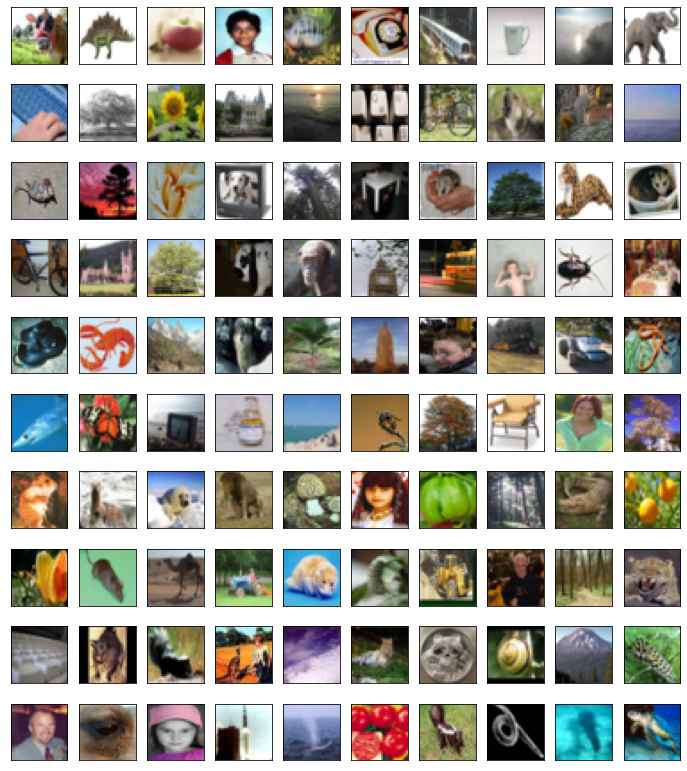

In [10]:
plot_images_labels_prediction(x_img_train,[],0)

# Image normalize 

In [11]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [12]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_image_test_normalize = x_image_test.astype('float32') /255.0

In [13]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [14]:
y_label_train.shape

(50000, 1)

In [15]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [16]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [17]:
y_label_train_OneHot.shape

(50000, 100)

In [18]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.